In [1]:
%load_ext autoreload
%autoreload 2

import sys
 
# setting path
sys.path.append('../read_data/')
sys.path.append('../')

import glob

import matplotlib.pyplot as plt

from bbox_utils import generate_default_boxes, convert_to_box_form

from dataGenerator import DataGenerator
from classification_loss import SSDLoss

import numpy as np

import tensorflow as tf

In [2]:
import cv2

In [3]:
loss = SSDLoss()

In [4]:
model = tf.keras.models.load_model('/Users/usmanr/workspace/SSDLoss/models/ssd_1000_img', 
                                  custom_objects={'localization_loss': loss.localization_loss, 
                                                 'confidence_loss': loss.confidence_loss})

2022-09-04 21:21:22.108314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 300, 300, 64  1792        ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 conv1_2 (Conv2D)               (None, 300, 300, 64  36928       ['conv1_1[0][0]']                
                                )                                                             

                                                                                                  
 conv8_2_mbox_conf (Conv2D)     (None, 3, 3, 24)     55320       ['conv8_2[0][0]']                
                                                                                                  
 conv9_2_mbox_conf (Conv2D)     (None, 1, 1, 24)     55320       ['conv9_2[0][0]']                
                                                                                                  
 conv4_3_norm_mbox_loc (Conv2D)  (None, 38, 38, 16)  73744       ['conv4_3_norm[0][0]']           
                                                                                                  
 fc7_mbox_loc (Conv2D)          (None, 19, 19, 24)   221208      ['fc7[0][0]']                    
                                                                                                  
 conv6_2_mbox_loc (Conv2D)      (None, 10, 10, 24)   110616      ['conv6_2[0][0]']                
          

In [6]:
file_names = glob.glob('/Users/usmanr/workspace/fisheye_images/box_2d_annotations/*.txt')

list_IDs = []

for file_name in file_names:
    f = open(file_name)
    lines = f.readlines()
    if len(lines) > 0:
        list_IDs.append(file_name)

list_IDs = [f.split('/')[-1].replace('.txt', '') for f in list_IDs][:100]

# list_IDs = [f.split('/')[-1].replace('.txt', '') for f in file_names][:100]

In [7]:
image_path = '/Users/usmanr/workspace/fisheye_images/rgb_images/'
label_path = '/Users/usmanr/workspace/fisheye_images/box_2d_annotations'

feature_map_shapes = [38, 19, 10, 5, 3, 1]
aspect_ratios = [
    [1, 2, 0.5],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 0.5],
    [1, 2, 0.5]
]
number_of_feature_maps = 6

prior_boxes = generate_default_boxes(feature_map_shapes, number_of_feature_maps, aspect_ratios)
boxes = convert_to_box_form(prior_boxes)

In [19]:
dg = DataGenerator(list_IDs, 
                   label_path,
                   image_path, 
                   prior_boxes,
                   boxes,
                  batch_size = 8)

In [20]:
for d in dg:
    holdout = d
    break

In [21]:
pred = model.predict(holdout[0])

1/1 [==============================] - 2s 2s/step


In [22]:
conf_loss = pred[1]

In [33]:
conf_loss[2].shape

(8732, 6)

In [38]:
conf_loss[0][1]

array([0.2386632 , 0.30417326, 0.15045758, 0.13305925, 0.08205276,
       0.09159397], dtype=float32)

In [37]:
conf_loss[4][1]

array([0.2386632 , 0.30417326, 0.15045758, 0.13305925, 0.08205276,
       0.09159397], dtype=float32)

In [13]:
boxes_with_highest_conf = []

for i, conf in enumerate(conf_loss[0]):
    c = conf
    boxes_with_highest_conf.append([ np.max(c), np.argmax(c), i])

In [14]:
boxes_with_highest_conf.sort(reverse=False)

In [15]:
boxes_with_highest_conf

[[0.23946625, 0, 8729],
 [0.2395202, 0, 5780],
 [0.2395202, 0, 5786],
 [0.2395202, 0, 5792],
 [0.2395202, 0, 5798],
 [0.2395202, 0, 5804],
 [0.2395202, 0, 5810],
 [0.2395202, 0, 5816],
 [0.2395202, 0, 5822],
 [0.2395202, 0, 5828],
 [0.2395202, 0, 5834],
 [0.2395202, 0, 5840],
 [0.2395202, 0, 5846],
 [0.2395202, 0, 5852],
 [0.2395202, 0, 5858],
 [0.2395202, 0, 5864],
 [0.2395202, 0, 5870],
 [0.2395202, 0, 5876],
 [0.2395202, 0, 5882],
 [0.2395202, 0, 5888],
 [0.2395202, 0, 5894],
 [0.2395202, 0, 5900],
 [0.2395202, 0, 5906],
 [0.2395202, 0, 5912],
 [0.2395202, 0, 5918],
 [0.2395202, 0, 5924],
 [0.2395202, 0, 5930],
 [0.2395202, 0, 5936],
 [0.2395202, 0, 5942],
 [0.2395202, 0, 5948],
 [0.2395202, 0, 5954],
 [0.2395202, 0, 5960],
 [0.2395202, 0, 5966],
 [0.2395202, 0, 5972],
 [0.2395202, 0, 5978],
 [0.2395202, 0, 5984],
 [0.2395202, 0, 5990],
 [0.2395202, 0, 5996],
 [0.2395202, 0, 6002],
 [0.2395202, 0, 6008],
 [0.2395202, 0, 6014],
 [0.2395202, 0, 6020],
 [0.2395202, 0, 6026],
 [0.239520

In [16]:
image = holdout[0][0].copy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


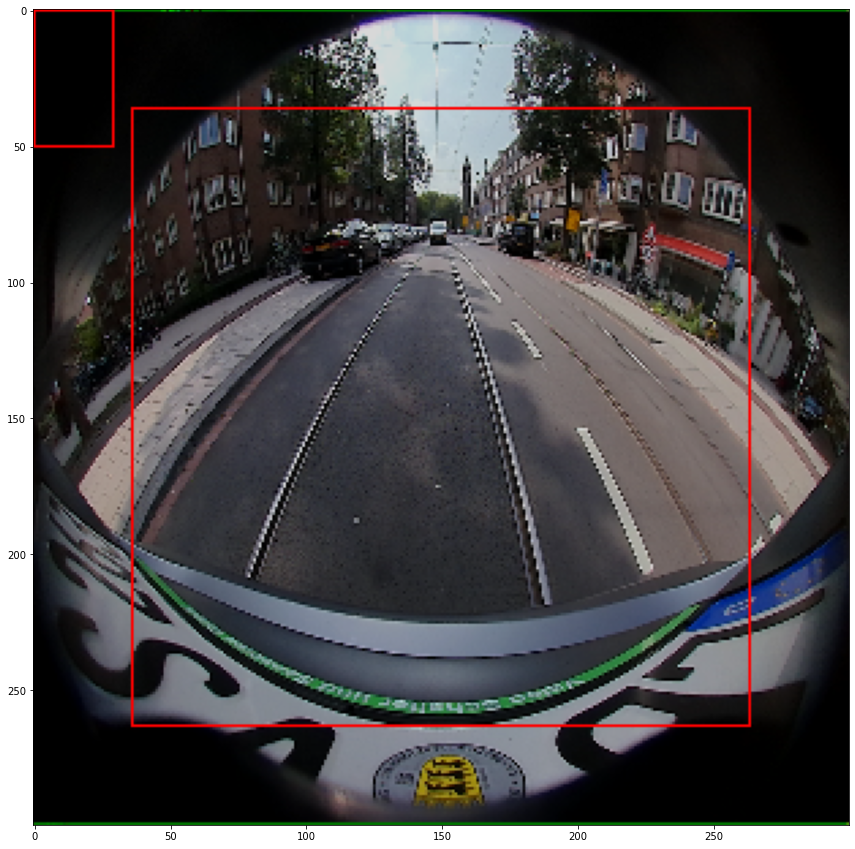

In [18]:
image_height = image_width = 300

plt.figure(figsize=(15, 15))

start_x, start_y, end_x, end_y = boxes[8729, :].numpy()
    
start_x, start_y, end_x, end_y = int(start_x * image_width), int(start_y * image_height), int(end_x * image_width), int(end_y * image_height)

image = cv2.rectangle(image, [start_x, start_y], [end_x, end_y], (255, 0, 0), thickness = 1)

plt.imshow(image)

In [40]:
10 ** 3 * 30 / 8732

3.435639028859368